https://github.com/dibgerge/ml-coursera-python-assignments

# Programming Exercise 1: Linear Regression

## Introduction

In this exercise, you will implement linear regression and get to see it work on data.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# library written for this exercise providing additional functions for assignment submission, and others
import utils 

## Linear regression with one variable

The file `Data/ex1data1.txt` contains the dataset for our linear regression problem. The first column is the population of a city (in 10,000s) and the second column is the profit of a food truck in that city (in $10,000s). A negative value for profit indicates a loss.

In [2]:
# Read comma separated data
data = np.loadtxt(os.path.join('Data', 'ex1data1.txt'), delimiter=',')
X, y = data[:, 0], data[:, 1]

m = y.size  # number of training examples

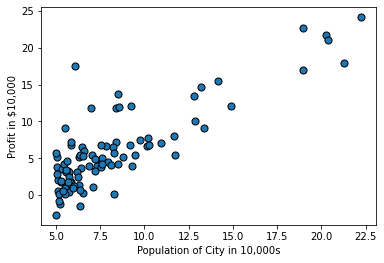

In [3]:
plt.scatter(X,y,s=50,edgecolors='black')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000');

### Gradient Descent

In this part, you will fit the linear regression parameters $\theta$ to our dataset using gradient descent.

####  Update Equations

The objective of linear regression is to minimize the cost function

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

where the hypothesis $h_\theta(x)$ is given by the linear model
$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1$$

Recall that the parameters of your model are the $\theta_j$ values. These are
the values you will adjust to minimize cost $J(\theta)$. One way to do this is to
use the batch gradient descent algorithm. In batch gradient descent, each
iteration performs the update

$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{simultaneously update } \theta_j \text{ for all } j$$

With each step of gradient descent, your parameters $\theta_j$ come closer to the optimal values that will achieve the lowest cost J($\theta$).

In [4]:
# Add a column of ones to X.
X = np.stack([np.ones(m), X], axis=1)

#### Computing the cost $J(\theta)$

In [5]:
def computeCost(X, y, theta):
    """
    Compute cost for linear regression. Computes the cost of using theta as the
    parameter for linear regression to fit the data points in X and y.
    
    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x n+1), where m is the number of examples,
        and n is the number of features. We assume a vector of one's already 
        appended to the features so we have n+1 columns.
    
    y : array_like
        The values of the function at each data point. This is a vector of
        shape (m, ).
    
    theta : array_like
        The parameters for the regression function. This is a vector of 
        shape (n+1, ).
    
    Returns
    -------
    J : float
        The value of the regression cost function.
    """    
    m = y.size  # number of training examples 
    
    J = 0  
    J = (1/(2*m))*np.power(X@theta - y,2).sum()

    return J

In [6]:
J = computeCost(X, y, theta=np.array([0.0, 0.0]))
print('With theta = [0, 0] \nCost computed = %.2f' % J)
print('Expected cost value (approximately) 32.07\n')

# further testing of the cost function
J = computeCost(X, y, theta=np.array([-1, 2]))
print('With theta = [-1, 2]\nCost computed = %.2f' % J)
print('Expected cost value (approximately) 54.24')

With theta = [0, 0] 
Cost computed = 32.07
Expected cost value (approximately) 32.07

With theta = [-1, 2]
Cost computed = 54.24
Expected cost value (approximately) 54.24


#### Gradient descent

In [7]:
def gradientDescent(X, y, theta, alpha, num_iters):
    """
    Performs gradient descent to learn `theta`. Updates theta by taking `num_iters`
    gradient steps with learning rate `alpha`.
    
    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x n+1).
    
    y : array_like
        Value at given features. A vector of shape (m, ).
    
    theta : array_like
        Initial values for the linear regression parameters. 
        A vector of shape (n+1, ).
    
    alpha : float
        The learning rate.
    
    num_iters : int
        The number of iterations for gradient descent. 
    
    Returns
    -------
    theta : array_like
        The learned linear regression parameters. A vector of shape (n+1, ).
    
    J_history : list
        A python list for the values of the cost function after each iteration.
    """
    
    m = y.shape[0]  # number of training examples
    
    # making a copy of theta, to avoid changing the original array, since numpy arrays
    # are passed by reference to functions
    theta = theta.copy()
    
    J_history = [] # Using a python list to save cost in every iteration
    
    for i in range(num_iters):
        theta -= (alpha/m)*((X@theta - y)@X)      
                
        J_history.append(computeCost(X, y, theta)) # saving the cost J in every iteration
    
    return theta, J_history

In [8]:
# initialize fitting parameters
theta = np.zeros(2)

# some gradient descent settings
iterations = 1500
alpha = 0.01

theta, J_history = gradientDescent(X ,y, theta, alpha, iterations)
print('Theta found by gradient descent: {:.4f}, {:.4f}'.format(*theta))
print('Expected theta values (approximately): [-3.6303, 1.1664]')

Theta found by gradient descent: -3.6303, 1.1664
Expected theta values (approximately): [-3.6303, 1.1664]


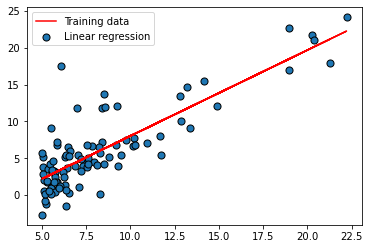

In [9]:
plt.scatter(X[:,1],y,s=50,edgecolors='black')
plt.plot(X[:, 1], np.dot(X, theta), '-',c='r')
plt.legend(['Training data', 'Linear regression']);

In [10]:
# Predicting values for population sizes of 35,000 and 70,000
predict1 = np.dot([1, 3.5], theta)
print('For population = 35,000, we predict a profit of {:.2f}\n'.format(predict1*10000))

predict2 = np.dot([1, 7], theta)
print('For population = 70,000, we predict a profit of {:.2f}\n'.format(predict2*10000))

For population = 35,000, we predict a profit of 4519.77

For population = 70,000, we predict a profit of 45342.45



## Linear regression with multiple variables

###  Feature Normalization

We start by loading and displaying some values from this dataset. By looking at the values, note that house sizes are about 1000 times the number of bedrooms. When features differ by orders of magnitude, first performing feature scaling can make gradient descent converge much more quickly.

In [11]:
# Load data
data = np.loadtxt(os.path.join('Data', 'ex1data2.txt'), delimiter=',')
X = data[:, :2]
y = data[:, 2]
m = y.size

# print out some data points
print('{:>8s}{:>8s}{:>10s}'.format('X[:,0]', 'X[:, 1]', 'y'))
print('-'*26)
for i in range(10):
    print('{:8.0f}{:8.0f}{:10.0f}'.format(X[i, 0], X[i, 1], y[i]))

  X[:,0] X[:, 1]         y
--------------------------
    2104       3    399900
    1600       3    329900
    2400       3    369000
    1416       2    232000
    3000       4    539900
    1985       4    299900
    1534       3    314900
    1427       3    198999
    1380       3    212000
    1494       3    242500


In [12]:
def  featureNormalize(X):
    """
    Normalizes the features in X. returns a normalized version of X where
    the mean value of each feature is 0 and the standard deviation
    is 1. This is often a good preprocessing step to do when working with
    learning algorithms.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n).
    
    Returns
    -------
    X_norm : array_like
        The normalized dataset of shape (m x n).
    """

    X_norm = X.copy()

    mu = X_norm.mean(axis=0)
    X_norm = X_norm - mu
    sigma = (X_norm - mu).std(axis=0)
    X_norm = X_norm / sigma

    return X_norm, mu, sigma

In [13]:
# call featureNormalize on the loaded data
X_norm, mu, sigma = featureNormalize(X)

print('Computed mean:', mu)
print('Computed standard deviation:', sigma)

Computed mean: [2000.68085106    3.17021277]
Computed standard deviation: [7.86202619e+02 7.52842809e-01]


After the `featureNormalize` function is tested, we now add the intercept term to `X_norm`:

In [14]:
# Add intercept term to X
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

### Gradient Descent

Previously, you implemented gradient descent on a univariate regression problem. The only difference now is that there is one more feature in the matrix $X$. The hypothesis function and the batch gradient descent update
rule remain unchanged.

In [15]:
def computeCostMulti(X, y, theta):
    """
    Compute cost for linear regression with multiple variables.
    Computes the cost of using theta as the parameter for linear regression to fit the data points in X and y.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).
    
    y : array_like
        A vector of shape (m, ) for the values at a given data point.
    
    theta : array_like
        The linear regression parameters. A vector of shape (n+1, )
    
    Returns
    -------
    J : float
        The value of the cost function. 
    """
    
    m = y.shape[0] # number of training examples

    J = (1/(2*m))*np.power(X@theta - y,2).sum()      

    return J

In [16]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    """
    Performs gradient descent to learn theta.
    Updates theta by taking num_iters gradient steps with learning rate alpha.
        
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).
    
    y : array_like
        A vector of shape (m, ) for the values at a given data point.
    
    theta : array_like
        The linear regression parameters. A vector of shape (n+1, )
    
    alpha : float
        The learning rate for gradient descent. 
    
    num_iters : int
        The number of iterations to run gradient descent. 
    
    Returns
    -------
    theta : array_like
        The learned linear regression parameters. A vector of shape (n+1, ).
    
    J_history : list
        A python list for the values of the cost function after each iteration.
    """
    m = y.shape[0] # number of training examples  
    
    theta = theta.copy() # making a copy of theta, which will be updated by gradient descent
    
    J_history = []
    
    for i in range(num_iters):       
        theta -= (alpha/m)*((X@theta - y)@X) 
        J_history.append(computeCostMulti(X, y, theta)) # saving the cost J in every iteration
    
    return theta, J_history

### Normal Equations

In the lecture videos, you learned that the closed-form solution to linear regression is

$$ \theta = \left( X^T X\right)^{-1} X^T\vec{y}$$

Using this formula does not require any feature scaling, and you will get an exact solution in one calculation: there is no “loop until convergence” like in gradient descent. 

In [17]:
# Load data
data = np.loadtxt(os.path.join('Data', 'ex1data2.txt'), delimiter=',')
X = data[:, :2]
y = data[:, 2]
m = y.size
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [18]:
def normalEqn(X, y):
    """
    Computes the closed-form solution to linear regression using the normal equations.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).
    
    y : array_like
        The value at each data point. A vector of shape (m, ).
    
    Returns
    -------
    theta : array_like
        Estimated linear regression parameters. A vector of shape (n+1, ).
    """
    theta = ((np.linalg.inv((X.T)@X))@(X.T))@y
    
    return theta

In [19]:
# Calculate the parameters from the normal equation
theta = normalEqn(X, y);

# Display normal equation's result
print('Theta computed from the normal equations: {:s}'.format(str(theta)));

# Estimate the price of a 1650 sq-ft, 3 br house
# ====================== YOUR CODE HERE ======================
features = [1,1650,3]
price = features @ theta # You should change this

# ============================================================

print('Predicted price of a 1650 sq-ft, 3 br house (using normal equations): ${:.0f}'.format(price))

Theta computed from the normal equations: [89597.9095428    139.21067402 -8738.01911233]
Predicted price of a 1650 sq-ft, 3 br house (using normal equations): $293081
